<a href="https://colab.research.google.com/github/Inhusa/AI-class/blob/main/5%20week/DL_Regression_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DL_Regression_Data  
- 집 값 예측하기  
- *Regression 중 임의의 값 예측하기*

#### 라이브러리 호출 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/Inhusa/AI-class/refs/heads/main/5%20week/kc_house_data.csv"
df = pd.read_csv(url)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Data_preprocessing
- id / date는 집값과 상관관계가 불분명하므로 열 삭제

In [5]:
df = df.drop(columns=['id','date'],axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

- 상관관계 혼동행렬

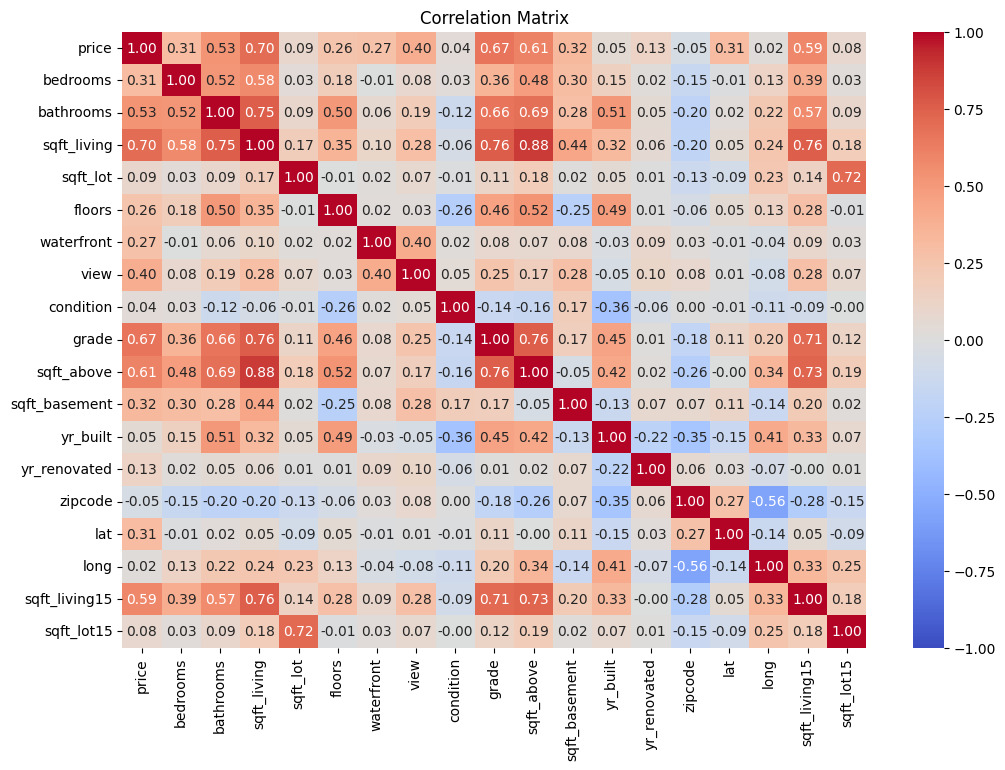

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Dataperprocessing_ Scaling
- X : feature 간 data범위의 값이 크게 차이남

In [17]:
from sklearn.preprocessing import StandardScaler
X= df.drop(columns=['price'],axis=1)
y= df['price']
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(df)
X_scaled


array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.00568792, -0.39873715,  0.1756067 , ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-0.98084935, -1.47395936, -1.44746357, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.38158814, -0.39873715,  0.50022075, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-0.58588173, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.41794772]])

#### 데이터 분할

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape

(17290, 19)

#### 신경망 객체 생성 및 구조 설계  
- regression 중 target 값이 임의의 값  
last_layer_ActivationFuntion : None  
Loss Function : MSE

In [27]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(19, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation=None))
model.compile( optimizer='adam', loss='mse', metrics=['mae','mse'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,165 (12.36 KB)

 Trainable params: 3,165 (12.36 KB)

 Non-trainable params: 0 (0.00 B)

- model 학습

In [28]:
history=model.fit(x=X_train, y=y_train, epochs=70, batch_size=100, validation_data= (X_test,y_test))

Epoch 1/70
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 412676358144.0000 - mae: 535455.3750 - mse: 412676358144.0000 - val_loss: 446707662848.0000 - val_mae: 545311.1250 - val_mse: 446707662848.0000
Epoch 2/70
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 381477126144.0000 - mae: 515170.9375 - mse: 381477126144.0000 - val_loss: 174132772864.0000 - val_mae: 334848.8438 - val_mse: 174132772864.0000
Epoch 3/70
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 102994690048.0000 - mae: 248612.8281 - mse: 102994690048.0000 - val_loss: 55570522112.0000 - val_mae: 174808.0625 - val_mse: 55570522112.0000
Epoch 4/70
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45127024640.0000 - mae: 162015.6562 - mse: 45127024640.0000 - val_loss: 42384461824.0000 - val_mae: 151248.5938 - val_mse: 42384461824.0000
Epoch 5/70
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35592159232.0000 - mae: 141177.1250 - mse: 35592159232.0000 - val_loss: 32774975488.0000 - val_mae: 131397.1719 - val_mse: 3277497

#### 결과지표 시각화
- MAE / MSE
- $R^2$ 결정계수

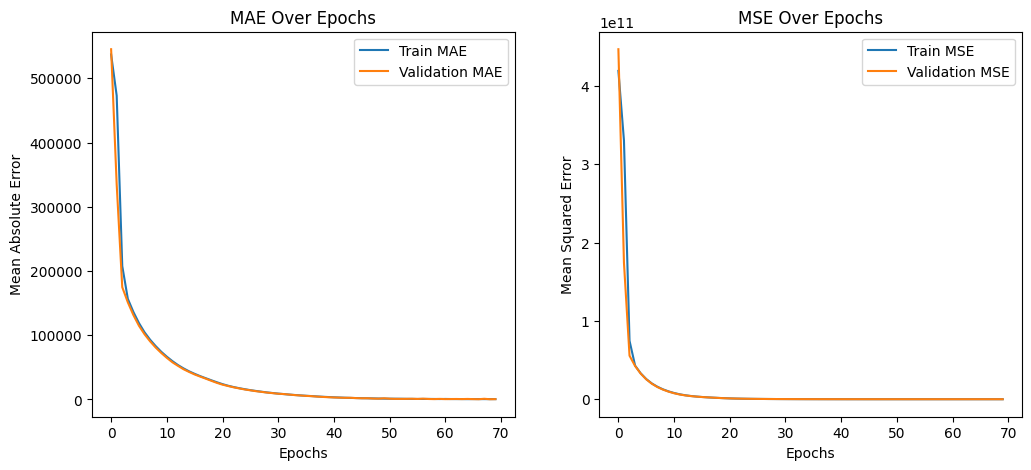

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']

# 그래프 그리기
plt.figure(figsize=(12, 5))

# Mean Absolute Error 시각화
plt.subplot(1, 2, 1)
plt.plot(mae, label='Train MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('MAE Over Epochs')
plt.legend()

# Mean Squared Error 시각화
plt.subplot(1, 2, 2)
plt.plot(mse, label='Train MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE Over Epochs')
plt.legend()

plt.show()


136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
R² Score: 1.0000


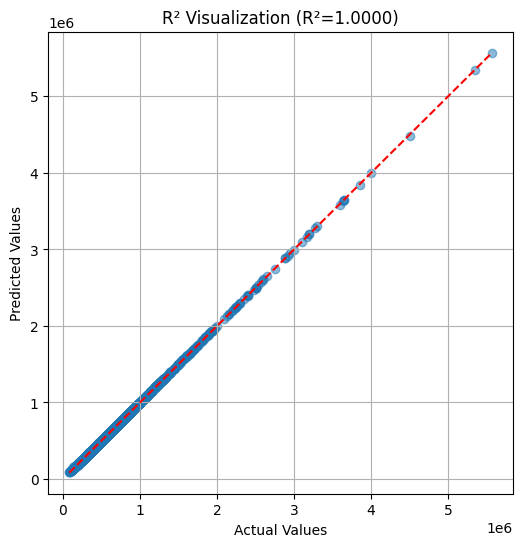

In [30]:
import numpy as np
from sklearn.metrics import r2_score

# 모델 예측
y_pred = model.predict(X_test)

# 결정계수 계산
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

# 산점도 시각화
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # y=x 기준선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R² Visualization (R²={r2:.4f})')
plt.grid(True)
plt.show()